In [1]:
import os, plotly
from IPython.display import display
from PIL import Image

import numpy as np
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event
import plotly.express as px
import plotly.graph_objs as go

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [46]:
event_prefix = 'event000001001'
hits, cells, particles, truth = load_event(os.path.join('./train_1/train_1/', event_prefix))

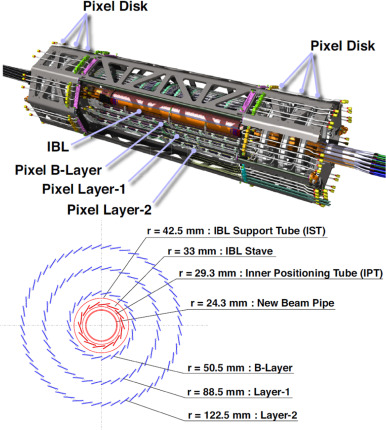

In [45]:
display(Image.open('arch.jpg'))

D:\IDE\anaconda3\envs\trackml-req\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

D:\IDE\anaconda3\envs\trackml-req\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



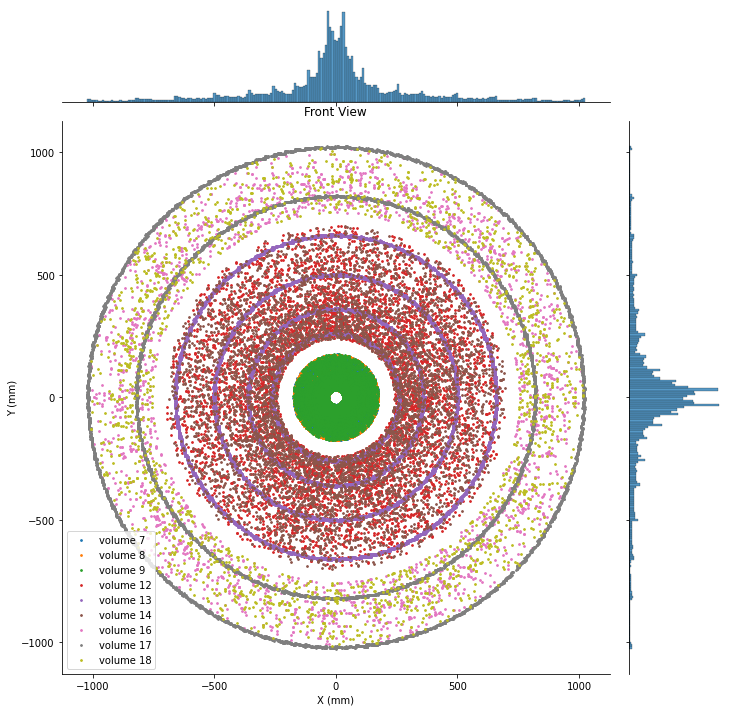

In [42]:
g = sns.jointplot(hits.x, hits.y,  s=1, height=10)
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.x, v.y, s=3, label='volume {}'.format(volume))

plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Front View')
plt.legend()
plt.show()

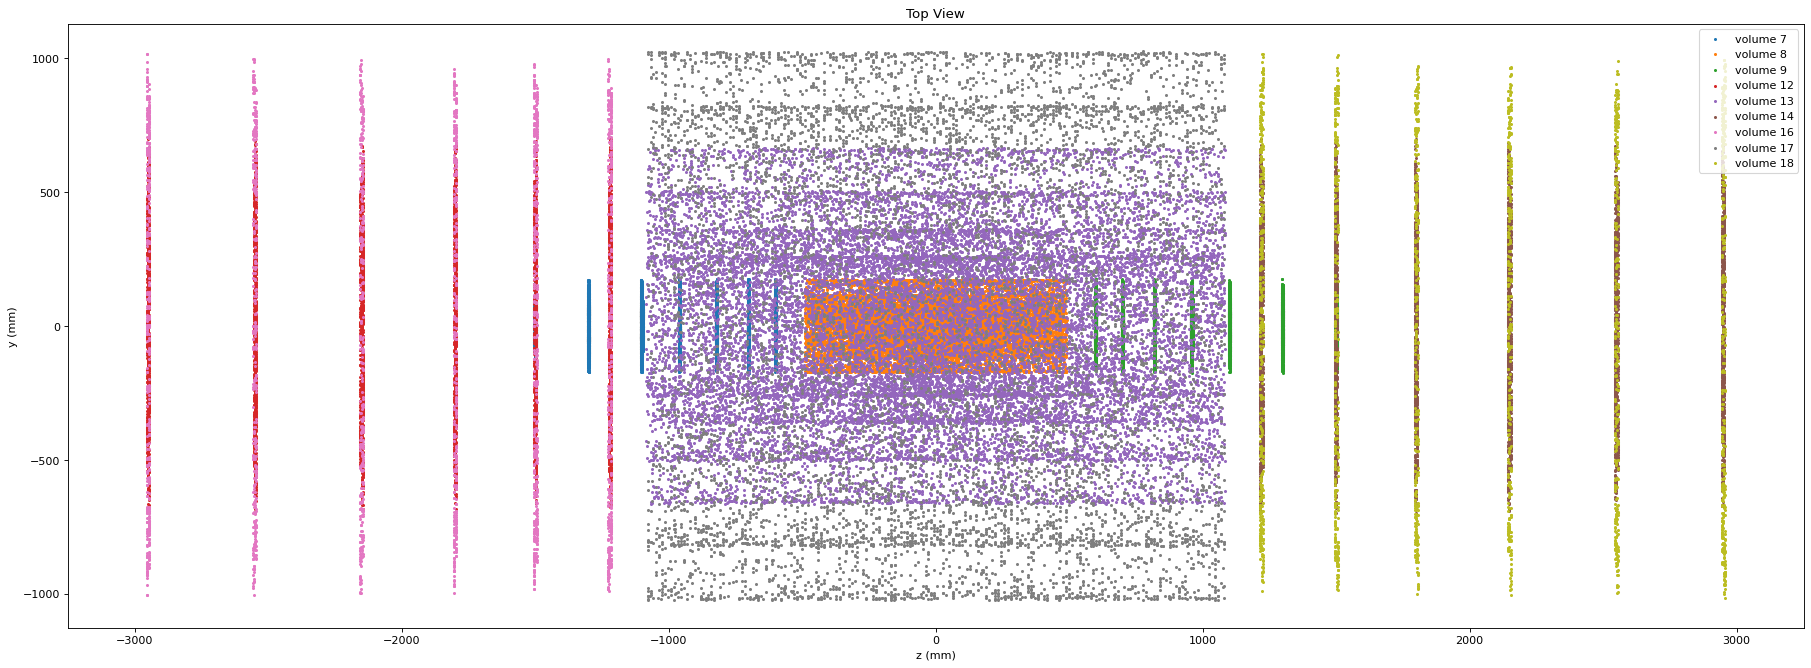

In [44]:
plt.figure(figsize=(28, 10), dpi=80)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.z, v.y, s=3, label='volume {}'.format(volume))

plt.xlabel('z (mm)')
plt.ylabel('y (mm)')
plt.title('Top View')
plt.legend()
plt.show()

In [9]:
temp_hits = hits.copy()
temp_hits[['volume_id', 'layer_id','module_id']] = temp_hits[['volume_id', 'layer_id','module_id']].astype(str)

In [10]:
# Let's take 2.5K samples and plot them in 3D
fig = px.scatter_3d(temp_hits.sample(2500), x='z', y='x', z='y',
              color='volume_id', range_x=[-3000, 3000],range_y=[-3000, 3000],range_z=[-3000, 3000])

fig.show()

In [14]:
import plotly.express as px

# Visualising them by layers
fig = px.scatter_3d(temp_hits.sample(2500), x='z', y='x', z='y',
              color='layer_id', range_x=[-3000, 3000],range_y=[-3000, 3000],range_z=[-3000, 3000],color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"])

fig.show()

In [15]:
import plotly.express as px
# Visualising them by modules
fig = px.scatter_3d(temp_hits.sample(2500), x='z', y='x', z='y',
              color='module_id', range_x=[-3000, 3000],range_y=[-3000, 3000],range_z=[-3000, 3000],color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"])

fig.show()

In [16]:
new_hits_cells = pd.merge(cells, hits, on="hit_id")
new_hits_cells.head()

hit_id  ch0   ch1     value          x         y       z  volume_id  \
0       1   75   695  0.273036 -69.271698 -0.812497 -1502.5          7   
1       2  218   777  0.316162 -73.308998 -8.302350 -1502.5          7   
2       3  179   605  0.224628 -63.816799 -5.599270 -1502.5          7   
3       4  248   758  0.326977 -72.125801 -9.713870 -1502.5          7   
4       5   34  1124  0.134510 -93.487503 -0.685854 -1502.5          7   

   layer_id  module_id  
0         2          1  
1         2          1  
2         2          1  
3         2          1  
4         2          1

In [17]:
temp_new_hits_cells = new_hits_cells.copy()
temp_new_hits_cells[['volume_id', 'layer_id','module_id','ch0', 'ch1']] = temp_new_hits_cells[['volume_id', 'layer_id','module_id','ch0', 'ch1']].astype(str)

In [22]:
# Let's take 2.5K samples and plot them in 3D
fig = px.scatter_3d(temp_new_hits_cells.sample(2500), x='z', y='x', z='y',
              color='ch0', range_x=[-3000, 3000],range_y=[-3000, 3000],range_z=[-3000, 3000])

fig.show()

In [23]:
particles.describe()

particle_id           vx           vy           vz           px  \
count  8.915000e+03  8915.000000  8915.000000  8915.000000  8915.000000   
mean   4.573748e+17    -2.665231     0.595084     1.912346    -0.005370   
std    2.752129e+17   117.348183   122.087440   539.825134     0.965891   
min    4.503668e+15  -949.653992  -951.742004 -2951.500000   -27.372601   
25%    2.161794e+17    -0.014083    -0.013825    -4.766730    -0.207355   
50%    4.503624e+17    -0.000755    -0.001626     0.111530    -0.001162   
75%    7.070686e+17     0.011532     0.015556     5.699360     0.207337   
max    9.097356e+17   972.028015   951.838013  2979.399902    67.819000   

                py           pz            q        nhits  
count  8915.000000  8915.000000  8915.000000  8915.000000  
mean     -0.013562    -0.220673     0.099944     8.548514  
std       0.896596     6.662701     0.995049     5.043070  
min     -36.701900  -170.863998    -1.000000     0.000000  
25%      -0.212469    -0.992396    -1.000000     4.000000  
50%      -0.002404    -0.021128     1.000000    11.000000  
75%       0.206914     0.750374     1.000000    12.000000  
max      14.552200    67.046700     1.000000    19.000000

Charge(Q) is either +1 or -1 and Based on the mean of the 'Q', there are slightly more postively charged particles than 
negatively charged particles

There are record with no hits and it goes upto maximum of 19 in this set

In [21]:
fig = px.scatter_3d(particles.sample(5000), x='vz', y='vx', z='vy',
              color='q', range_x=[-3000, 3000],range_y=[-3000, 3000],range_z=[-3000, 3000])

fig.show()

# Particle trajectories in spherical and polar coordinate

In [25]:
def cart_to_spherical(cart):
    r = np.linalg.norm(cart, axis=0)
    theta = np.degrees(np.arccos(cart[2] / r))
    phi = np.degrees(np.arctan2(cart[1], cart[0]))
    return np.vstack((r, theta, phi))

In [26]:
def cartesian_to_3d_polar(x,y,z):
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    s  = np.sin(phi)
    c  = np.cos(phi)
    return np.vstack((r, s, c))

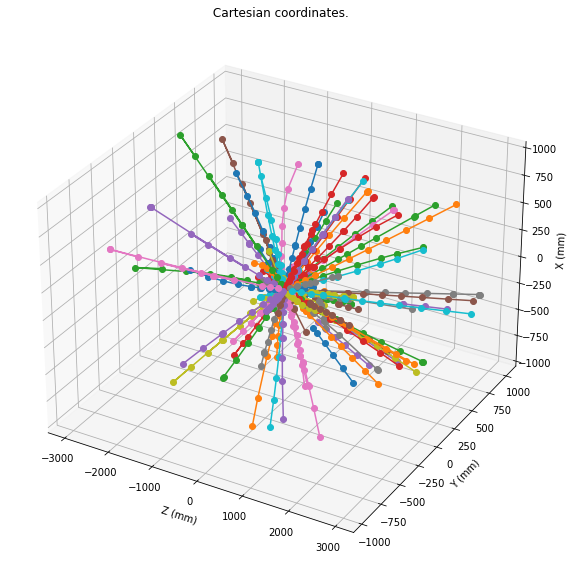

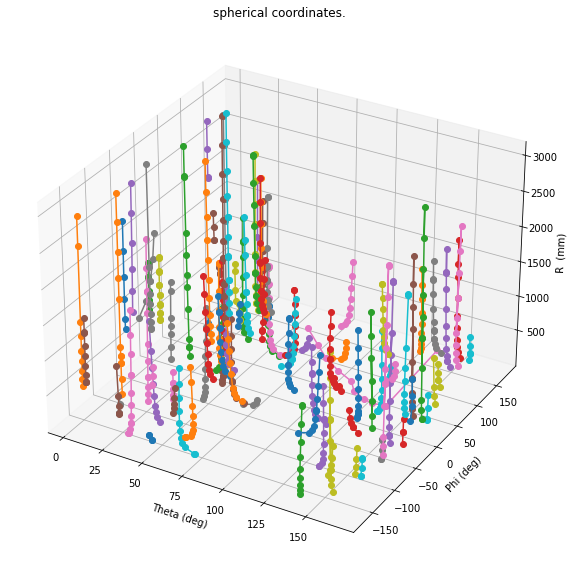

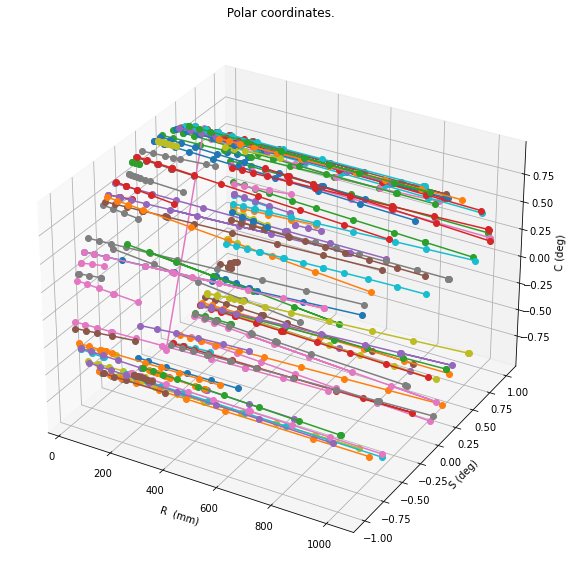

In [38]:
truth_dedup = truth.drop_duplicates('particle_id')
truth_sort = truth_dedup.sort_values('weight', ascending=False)
truth_head = truth_sort.head(100)


p_traj_list = []
for _, tr in truth_head.iterrows():
    p_traj = truth[truth.particle_id == tr.particle_id][['tx', 'ty', 'tz']]

    p_traj_list.append(p_traj)
    

rtp_list = []
for p_traj in p_traj_list:
    xyz = p_traj.loc[:, ['tx', 'ty', 'tz']].values.transpose()
    rtp = cart_to_spherical(xyz).transpose()
    rtp_df = pd.DataFrame(rtp, columns=('r', 'theta', 'phi'))
    rtp_list.append(rtp_df)

polar_list = []
for p_traj in p_traj_list:
    x,y,z = p_traj.loc[:,'tx'].values,p_traj.loc[:,'ty'].values,p_traj.loc[:,'tz'].values
    
    polar = cartesian_to_3d_polar(x,y,z).transpose()
    polar_df = pd.DataFrame(polar, columns=('r', 's', 'c'))
    polar_list.append(polar_df)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for p_traj in p_traj_list:
    ax.plot(zs=p_traj.tx, ys=p_traj.ty, xs=p_traj.tz, marker='o')

ax.set_xlabel('Z (mm) ')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('X (mm)')

plt.title(' Cartesian coordinates.')

# Plot with spherical coordinates.
fig2 = plt.figure(figsize=(10, 10))
ax = fig2.add_subplot(111, projection='3d')
for rtp_df in rtp_list:
    ax.plot(zs=rtp_df.r, ys=rtp_df.phi, xs=rtp_df.theta,marker='o')

ax.set_xlabel('Theta (deg) ')
ax.set_ylabel('Phi (deg) ')
ax.set_zlabel('R  (mm) ')
plt.title('spherical coordinates.')
plt.show()

# Plot with spherical coordinates.
fig3 = plt.figure(figsize=(10, 10))
ax = fig3.add_subplot(111, projection='3d')
for polar_df in polar_list:
    ax.plot(zs=polar_df.c, ys=polar_df.s, xs=polar_df.r,marker='o')

ax.set_xlabel('R  (mm) ')
ax.set_ylabel('S (deg) ')
ax.set_zlabel('C (deg) ')

plt.title(' Polar coordinates.')
plt.show()

min    0.000000
max    0.000232
Name: weight, dtype: float64


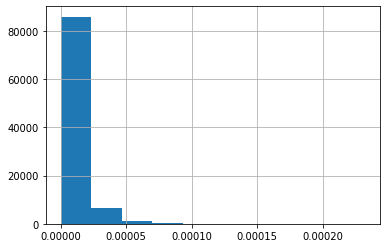

In [37]:
truth['weight'].hist()
print(truth['weight'].describe()[['min', 'max']])